In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv("data/jiji_car_evaluation.csv")
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,"₦ 8,850,000"
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,NaN,Idu Industrial,"₦ 365,000,000"
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,"₦ 7,250,000"
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,"₦ 11,000,000"
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,"₦ 14,200,000"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   condition     2000 non-null   object 
 2   transmission  1994 non-null   object 
 3   make          1773 non-null   object 
 4   model         1773 non-null   object 
 5   year          881 non-null    float64
 6   location      2000 non-null   object 
 7   price         2000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.1+ KB


In [22]:
df['price'] = df['price'].replace('[₦,]', '', regex=True).astype(float)
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000.0
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,NaN,Idu Industrial,365000000.0
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,7250000.0
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,11000000.0
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,14200000.0


In [23]:
df.isnull().sum()

title              0
condition          0
transmission       6
make             227
model            227
year            1119
location           0
price              0
dtype: int64

In [25]:
df.isnull().sum()
df.dropna(inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 1983
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         878 non-null    object 
 1   condition     878 non-null    object 
 2   transmission  878 non-null    object 
 3   make          878 non-null    object 
 4   model         878 non-null    object 
 5   year          878 non-null    float64
 6   location      878 non-null    object 
 7   price         878 non-null    float64
dtypes: float64(2), object(6)
memory usage: 61.7+ KB


title           0
condition       0
transmission    0
make            0
model           0
year            0
location        0
price           0
dtype: int64

In [28]:
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 1983
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         878 non-null    int64  
 1   condition     878 non-null    int64  
 2   transmission  878 non-null    int64  
 3   make          878 non-null    int64  
 4   model         878 non-null    int64  
 5   year          878 non-null    int64  
 6   location      878 non-null    int64  
 7   price         878 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 61.7 KB


In [29]:
categorical_cols = ['title', 'condition', 'transmission', 'make', 'model', 'location']
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.head()
    

,title,condition,transmission,make,model,year,location,price
0,211,0,0,15,116,2007,31,8850000.0
7,668,0,0,34,142,2015,5,21000000.0
8,385,0,1,25,61,2002,28,4500000.0
9,1,0,0,0,105,2008,9,11500000.0
10,492,1,0,34,46,2008,31,7200000.0


Text(0.5, 1.0, 'Correlation Matrix')

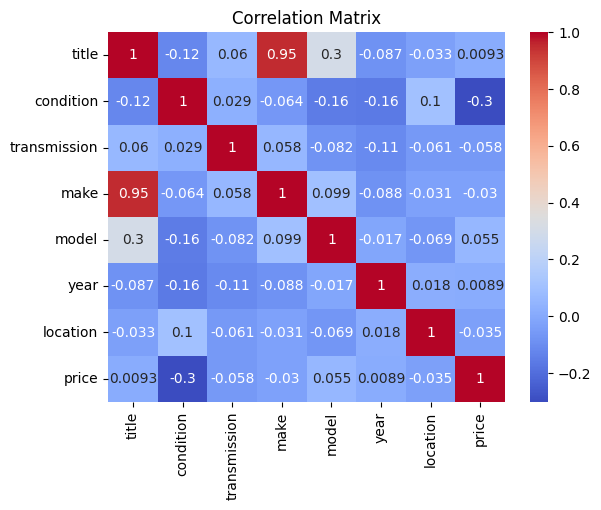

In [30]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [31]:
X = df.drop(columns=["price", "title"], axis=1)
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = model.predict(X_test)

In [35]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 6722113.680895138
R2 Score: -3.1717486377056403


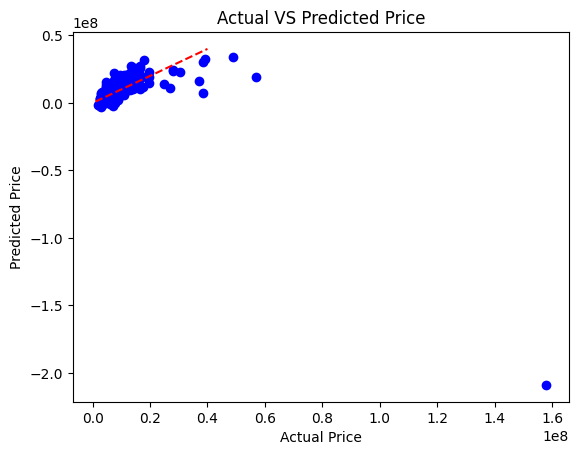

In [36]:
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Price")
plt.plot([1000000, 40000000], [1000000, 40000000], '--r')

In [86]:
d_model = DecisionTreeRegressor()
d_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [87]:
d_y_pred = d_model.predict(X_test)

In [89]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, d_y_pred)}")
print(f"R2 Score: {r2_score(y_test, d_y_pred)}")

Mean Absolute Error: 6250046.6335227275
R2 Score: -0.10781248269433741
